In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import roberts , sobel , scharr , prewitt
from scipy import ndimage as nd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# image_url = input("Enter the url of the training image:-")
# ground_truth_url =input("Enter the url of the ground truth image:-")
image_url = "/content/drive/My Drive/AI-Project/image_part_001.jpg"
ground_truth_url ="/content/drive/My Drive/AI-Project/image_part_001.png"

**Preprocessing the image**

In [7]:
image = cv2.imread(image_url)

In [8]:
#converting to gray
image_grey=cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [9]:
df=pd.DataFrame()

In [10]:
#Adding the features to the dataframe
imagegrey_reshaped = image_grey.reshape(-1)
df['Original Image'] = imagegrey_reshaped

In [11]:
#2) generating the Gabor features and gabor Feature the the dataframe
num = 1
kernels = []
for theta in range(2):
  theta = theta / 4. * np.pi
  for sigma in (1,3):
    for lamda in np.arange( 0 , np.pi , np.pi/4):
      for gamma in (0.05, 0.5):

        gabor_label = 'Gabor' + str(num)

        ksize = 5
        kernel = cv2.getGaborKernel((ksize,ksize),sigma, theta , lamda , gamma,0,ktype= cv2.CV_32F)

        kernels.append(kernel)
        #now applying the filter on image and adding vales to the new column
        fimg = cv2.filter2D(imagegrey_reshaped,cv2.CV_8UC3,kernel)
        filtered_img = fimg.reshape(-1)
        df[gabor_label] = filtered_img
        print(gabor_label , ': theta = ',theta,': sigma = ', ': lamda = ',lamda,": gamma = ",gamma)
        num=num+1

Gabor1 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor2 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor3 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor4 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor5 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor6 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.5
Gabor7 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.05
Gabor8 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.5
Gabor9 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor10 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor11 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor12 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor13 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor14 : theta =  0.0 : sigma =  : l

In [12]:
#3) Adding Canny Edge filter- edge detection filter
edges = cv2.Canny(image_grey,100,200)
edges_reshaped = edges.reshape(-1)
df['Canny Edge'] = edges_reshaped

In [13]:
edge_roberts = roberts(image_grey)
edge_roberts_reshaped = edge_roberts.reshape(-1)
df['Roberts']=edge_roberts_reshaped

In [14]:
edge_sobel = sobel(image_grey)
edge_sobel_reshaped = edge_sobel.reshape(-1)
df['Sobel']=edge_sobel_reshaped

In [15]:
edge_scharr = scharr(image_grey)
edge_scharr_reshaped = edge_scharr.reshape(-1)
df['Scharr']=edge_scharr_reshaped

In [16]:
edge_prewitt = prewitt(image_grey)
edge_prewitt_reshaped = edge_prewitt.reshape(-1)
df['Prewitt']=edge_prewitt_reshaped

In [17]:
gaussian_img = nd.gaussian_filter(image_grey,sigma=3)
gaussian_img_reshaped = gaussian_img.reshape(-1)
df['Gaussian s3']=gaussian_img_reshaped

In [18]:
gaussian_img2 = nd.gaussian_filter(image_grey,sigma=7)
gaussian_img2_reshaped = gaussian_img2.reshape(-1)
df['Gaussian s7']=gaussian_img2_reshaped

In [19]:
median_img =  nd.median_filter(image_grey,size=3)
median_img_reshaped = median_img.reshape(-1)
df['Median s3']=median_img_reshaped

In [20]:
ground_truth=cv2.imread(ground_truth_url)
ground_truth_grey = cv2.cvtColor(ground_truth,cv2.COLOR_BGR2GRAY)
ground_truth_grey_reshaped=ground_truth_grey.reshape(-1)
df['Labels']=ground_truth_grey_reshaped

In [21]:
#seperating the independent and dependent variables
#dependent variable
y=df['Labels']
#independent variables
x=df.drop(['Labels'],axis=1)

In [22]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=10,random_state=42,warm_start=True)

# Define chunk size
chunk_size = 100000

iter=1
# # Iterate over chunks
for i in range(0, len(x_train), chunk_size):
    # Get the current chunk
    print(f"Iteration {iter}.")
    x_train_chunk = x_train.iloc[i:i + chunk_size]
    y_train_chunk = y_train.iloc[i:i + chunk_size]

    # Train the model on the current chunk
    model.fit(x_train_chunk, y_train_chunk)
    iter+=1

Iteration 1.
Iteration 2.
Iteration 3.
Iteration 4.
Iteration 5.
Iteration 6.
Iteration 7.
Iteration 8.
Iteration 9.
Iteration 10.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new t

Iteration 11.
Iteration 12.
Iteration 13.
Iteration 14.
Iteration 15.
Iteration 16.
Iteration 17.
Iteration 18.
Iteration 19.
Iteration 20.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new t

Iteration 21.
Iteration 22.
Iteration 23.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [24]:
y_pred=model.predict(x_test)

In [25]:
#Evaluating
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[138680  77958    281  39359   5101]
 [ 65828 717692    209  41042   2564]
 [  1522   1130   3217   8379    301]
 [ 37878  49701   2282 237165   5613]
 [ 20685   9293    207  24991   6857]]
              precision    recall  f1-score   support

          45       0.52      0.53      0.53    261379
          92       0.84      0.87      0.85    827335
         171       0.52      0.22      0.31     14549
         172       0.68      0.71      0.69    332639
         212       0.34      0.11      0.17     62033

    accuracy                           0.74   1497935
   macro avg       0.58      0.49      0.51   1497935
weighted avg       0.72      0.74      0.73   1497935

0.7367549326239122


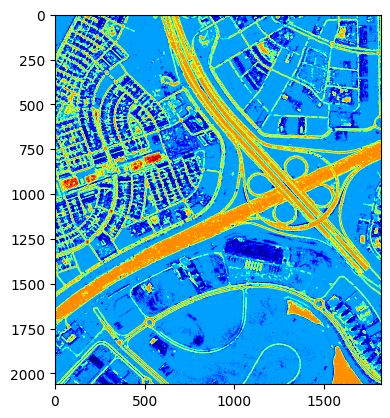

In [27]:
segmented = model.predict(x)
final_segmented = segmented.reshape(image_grey.shape)
plt.imshow(final_segmented , cmap="jet")

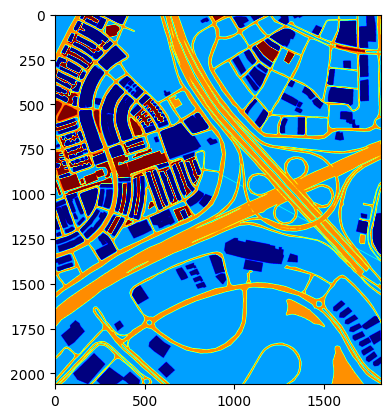

In [28]:
plt.imshow(ground_truth_grey,cmap="jet")

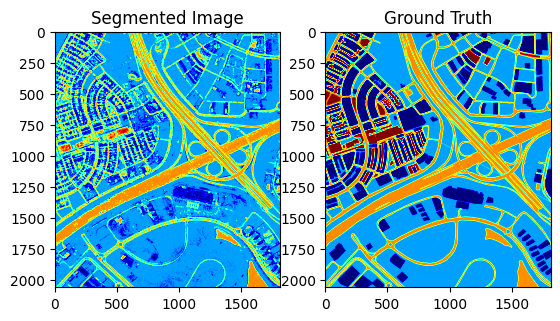

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(final_segmented , cmap="jet")
ax1.set_title('Segmented Image')
ax2.imshow(ground_truth_grey,cmap="jet")
ax2.set_title('Ground Truth')

# Show the plot
# plt.tight_layout()
plt.show()

In [53]:
def pixel_accuracy(segmented, ground_truth):
    """
    Calculate the pixel accuracy.
    """
    assert segmented.shape == ground_truth.shape, "Segmented and ground truth images must have the same shape!"

    # Count correctly predicted pixels
    correct_pixels = np.sum(segmented == ground_truth)
    total_pixels = ground_truth.size  # Total number of pixels

    return correct_pixels / total_pixels

def mean_iou(segmented, ground_truth, num_classes=20):
    """
    Calculate the mean Intersection over Union (IoU).
    """
    iou_scores = []

    for cls in range(num_classes):
        # Create masks for the current class
        pred_mask = segmented == cls
        gt_mask = ground_truth == cls

        # Calculate intersection and union
        intersection = np.logical_and(pred_mask, gt_mask)
        union = np.logical_or(pred_mask, gt_mask)

        # Avoid division by zero
        if np.sum(union) == 0:
            iou = 1  # If no union, consider IoU as 1 (perfect match for this class)
        else:
            iou = np.sum(intersection) / np.sum(union)

        iou_scores.append(iou)

    return np.mean(iou_scores)

pixel_accu = pixel_accuracy(final_segmented,ground_truth_grey)
# mean_IOU = mean_iou(final_segmented , ground_truth_grey)

print(f"Pixel Accuracy: {pixel_accu * 100:.2f}%")
# print(f"Mean IoU: {mean_IOU * 100:.2f}%")

Pixel Accuracy: 74.39%
Mean IoU: 100.00%


In [32]:
# imageurl2 = input("Enter the url of the image to be segmented:-")
# groundtruthimage2 = input("Enter the url of the ground truth of the image to be segmented:-")
image_url = "/content/drive/My Drive/AI-Project/image_part_003.jpg"
ground_truth_url ="/content/drive/My Drive/AI-Project/image_part_003.png"

In [33]:
image2 = cv2.imread(image_url)
#converting to gray
image_grey2=cv2.cvtColor(image2 , cv2.COLOR_BGR2GRAY)

In [34]:
#Creating a dataframe
df2=pd.DataFrame()
imagegrey2_reshaped = image_grey2.reshape(-1)
df2['Original Image'] = imagegrey2_reshaped

In [35]:
#2) generating the Gabor features and gabor Feature the the dataframe
num = 1
kernels = []
for theta in range(2):
  theta = theta / 4. * np.pi
  for sigma in (1,3):
    for lamda in np.arange( 0 , np.pi , np.pi/4):
      for gamma in (0.05, 0.5):

        gabor_label = 'Gabor' + str(num)

        ksize = 5
        kernel = cv2.getGaborKernel((ksize,ksize),sigma, theta , lamda , gamma,0,ktype= cv2.CV_32F)
        kernels.append(kernel)
        #now applying the filter on image and adding vales to the new column
        fimg = cv2.filter2D(imagegrey2_reshaped,cv2.CV_8UC3,kernel)
        filtered_img = fimg.reshape(-1)
        df2[gabor_label] = filtered_img
        print(gabor_label , ': theta = ',theta,': sigma = ', ': lamda = ',lamda,": gamma = ",gamma)
        num=num+1

Gabor1 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor2 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor3 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor4 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor5 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor6 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.5
Gabor7 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.05
Gabor8 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.5
Gabor9 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor10 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor11 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor12 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor13 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor14 : theta =  0.0 : sigma =  : l

In [36]:
edges = cv2.Canny(image_grey2,100,200)
edges_reshaped = edges.reshape(-1)
df2['Canny Edge'] = edges_reshaped

In [37]:
edge_roberts = roberts(image_grey2)
edge_roberts_reshaped = edge_roberts.reshape(-1)
df2['Roberts']=edge_roberts_reshaped

In [38]:
edge_sobel = sobel(image_grey2)
edge_sobel_reshaped = edge_sobel.reshape(-1)
df2['Sobel']=edge_sobel_reshaped

In [39]:
edge_scharr = scharr(image_grey2)
edge_scharr_reshaped = edge_scharr.reshape(-1)
df2['Scharr']=edge_scharr_reshaped

In [40]:
edge_prewitt = prewitt(image_grey2)
edge_prewitt_reshaped = edge_prewitt.reshape(-1)
df2['Prewitt']=edge_prewitt_reshaped

In [41]:
gaussian_img = nd.gaussian_filter(image_grey2,sigma=3)
gaussian_img_reshaped = gaussian_img.reshape(-1)
df2['Gaussian s3']=gaussian_img_reshaped

In [42]:
gaussian_img2 = nd.gaussian_filter(image_grey2,sigma=7)
gaussian_img2_reshaped = gaussian_img2.reshape(-1)
df2['Gaussian s7']=gaussian_img2_reshaped

In [43]:
median_img =  nd.median_filter(image_grey2,size=3)
median_img_reshaped = median_img.reshape(-1)
df2['Median s3']=median_img_reshaped

In [44]:
ground_truth2=cv2.imread(ground_truth_url)
ground_truth2_grey = cv2.cvtColor(ground_truth2,cv2.COLOR_BGR2GRAY)
ground_truth2_grey_reshaped  = ground_truth2_grey.reshape(-1)

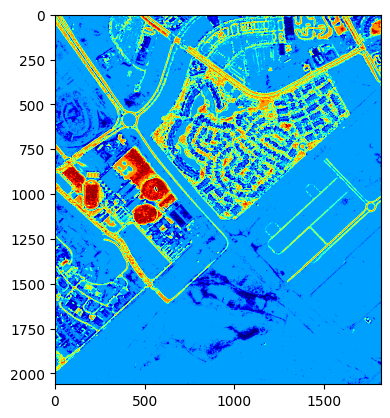

In [45]:
prediction2 = model.predict(df2)
final_segmented2 = prediction2.reshape(image_grey2.shape)
plt.imshow(final_segmented2 , cmap="jet")

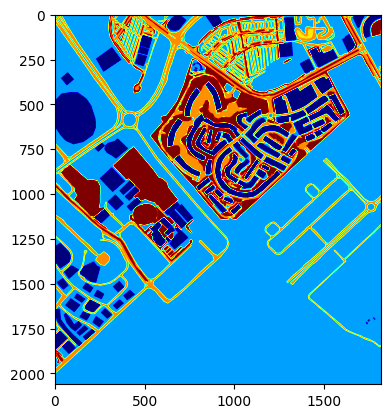

In [46]:
plt.imshow(ground_truth2_grey,cmap="jet")

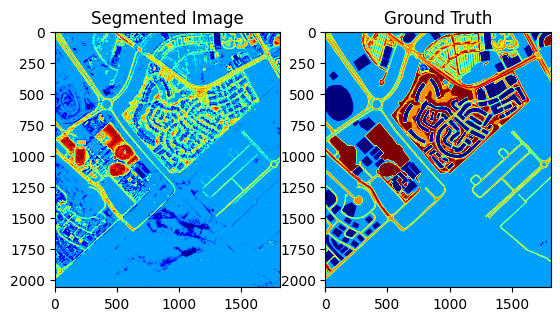

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(final_segmented2 , cmap="jet")
ax1.set_title('Segmented Image')
ax2.imshow(ground_truth2_grey,cmap="jet")
ax2.set_title('Ground Truth')

# Show the plot
# plt.tight_layout()
plt.show()

In [54]:
#Evalaution
print(confusion_matrix(ground_truth2_grey_reshaped,prediction2))
print(classification_report(ground_truth2_grey_reshaped,prediction2))
print(accuracy_score(ground_truth2_grey_reshaped,prediction2))

pixel_accu2 = pixel_accuracy(final_segmented2,ground_truth2_grey)
print(f"Pixel Accuracy: {pixel_accu2 * 100:.2f}%")

[[ 166083  211865       0     187   56820    5677]
 [ 143473 2255601       0     523   72276    5756]
 [    282    1921       0       0     304       8]
 [   1575   26030       0     148    2929      88]
 [  52244  161792       0    1673  194477   14049]
 [  76763   55273       0    3556  157329   76135]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          45       0.38      0.38      0.38    440632
          92       0.83      0.91      0.87   2477629
         155       0.00      0.00      0.00      2515
         171       0.02      0.00      0.01     30770
         172       0.40      0.46      0.43    424235
         212       0.75      0.21      0.32    369056

    accuracy                           0.72   3744837
   macro avg       0.40      0.33      0.33   3744837
weighted avg       0.71      0.72      0.70   3744837

0.7189749513797262
Pixel Accuracy: 71.90%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
